# Naive Bayes Classification
 

Naive Bayes Classification 은 모든 특성 값이 서로 독립임을 가정하여, 특성들 사이에서의 발생할 수 있는 연관성을 배제하고 각각의 특성이 분류할 대상에 대해 독립적으로 기여할 수 있도록 한다. 베이즈 정리와 조건부 확률을 이용하여 다음과 같이 사후 확률 (Posterior)에 대하여 사전 확률 (Prior) 과 우도 (Likelihood) 로 표현할 수 있다. 

* \\( \hat{y} = \text{argmax}_y p(y | X) \\)  
* \\( p(y|X) = \frac{p( \mathbf{X} | y) p(y)}{p(\mathbf{X})} \\)  
    * 사전 확률 (Prior Probability) : \\( p(y) \\)
    * 우도 (Likelihood Probability) : \\( p(X | y) =  \prod_i p(x_i | y) p(y) \;  \\)   
    * 사후 확률 (Posterior Probability) : \\( p(y | X)  \\)
    
(Naive Bayes Classifier : https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

#### < 예제 > Naive Bayes Classification 을 이용한 Spam filter

* 조건

    * 스팸 필터링을 위한 Naive Bayes model 의 독립 변수 (V)
        * V = ”secret”, ”offer”, ”low”, ”price”, ”valued”, ”customer”, ”today”, ”dollar”, ”million”, ”sports”, ”is”, ”for”, ”play”, ”healthy”, ”pizza”

    * 주어진 학습 데이터 (스팸 메시지 3개, 정상 메시지 4개)
        * 스팸 메시지 = ”million dollar offer”, ”secret offer today”, ”secret is secret”
        * 정상 메시지 = ”low price for valued customer”, ”play secret sports today”, ”sports is healthy”, ”low price pizza”


*  Naive Bayes model 과 학습 데이터로 제공된 메시지를 이용하여 각각의 확률을 계산
    * P(secret|spam) := Nd(secret,spam) / Nd(spam) = 2/3
    * P(spam) = ?
    * P(sports|non-spam) = ? 
    * P(dollar|spam) = ?
    * P(“sports is healthy”|spam) = ? 
    * P(“sports is healthy”|non-spam) = ?
    * P(spam|“sports is healthy”) = ? 
    * P(non-spam|“sports is healthy”) = ? 


* 학습된 Naive Bayes model 을 이용하여 스팸 메시지와 정상 메시지를 구분하는 코드 구현
    * \\( p(y|X) = \frac{p( \mathbf{X} | y) p(y)}{p(\mathbf{X})} \\)
    * matplotlib 라이브러리를 이용하여 visualization
      
 


In [1]:
import numpy as np

In [2]:
# Naive bayes model

V = ["secret", "offer", "low", "price", "valued", "customer", "today", "dollar", "million", "sports", "is", "for", "play", "healthy", "pizza"]

In [3]:
# 단어 별 인덱스 추가

v_idx_mapping = {}
for i, word in enumerate(V):
    v_idx_mapping[word] = i


In [4]:
v_idx_mapping

{'secret': 0,
 'offer': 1,
 'low': 2,
 'price': 3,
 'valued': 4,
 'customer': 5,
 'today': 6,
 'dollar': 7,
 'million': 8,
 'sports': 9,
 'is': 10,
 'for': 11,
 'play': 12,
 'healthy': 13,
 'pizza': 14}

In [5]:
# 주어진 학습 데이터 
# 스팸 메시지 : spam_msgs
# 정상 메시지 : ham_msgs 

spam_msgs = ["million dollar offer", "secret offer today", "secret is secret"]
ham_msgs = ["low price for valued customer offer", "play secret sports today", "sports is healthy", "low price pizza"]

# ' '.join(spam_msgs)
# TEXT.split(' ')

# msgs = spam_msgs + ham_msgs
# words = ' '.join(msgs).split(' ')
# words = list(set(words))
# print(len(words))


In [6]:
table = np.zeros([2, len(V)])

# 주어진 메시지를 단어 단위로 구분
# 중복 단어 제거 

spam_list = [ set(spam_msg.split(' ')) for spam_msg in spam_msgs ]
ham_list = [ set(ham_msg.split(' ')) for ham_msg in ham_msgs ]
print(spam_list)
print(ham_list)

[{'million', 'dollar', 'offer'}, {'offer', 'secret', 'today'}, {'secret', 'is'}]
[{'low', 'valued', 'for', 'offer', 'customer', 'price'}, {'sports', 'secret', 'play', 'today'}, {'healthy', 'sports', 'is'}, {'pizza', 'price', 'low'}]


In [7]:
V

['secret',
 'offer',
 'low',
 'price',
 'valued',
 'customer',
 'today',
 'dollar',
 'million',
 'sports',
 'is',
 'for',
 'play',
 'healthy',
 'pizza']

In [8]:
# 스팸 메시지와 정상 메시지를 구성하는 단어의 수를 계산하여 Table 에 입력
# 스팸 : [0, :] / 정상 : [1, :]

for i, word in enumerate(V):
    for spam_msg in spam_list:
        table[0][v_idx_mapping[word]] += word in spam_msg
    
    for ham_msg in ham_list:
        table[1][i] += word in ham_msg

In [9]:
# y label : 스팸 메시지, 정상 메시지
# X data : Naive Bayes model (V)
# tabel : 학습 데이터로부터 계산한 스팸 메시지와 정상 메시지의 단어 수

table

array([[2., 2., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 2., 2., 1., 1., 1., 0., 0., 2., 1., 1., 1., 1., 1.]])

In [10]:
# num_spam : 스팸 메시지 수
# num_ham : 정상 메시지 수
# num_total : 총 메시지 수

num_spam = len(spam_msgs)
num_ham = len(ham_msgs)
num_total = num_ham + num_spam


# 사전 확률 (prior) : P(spam), P(ham) 

p_spam = num_spam / num_total # P(Spam) = 3/7
p_ham = num_ham / num_total # P(Non-Spam) = 4/7

In [11]:
# p_xi_y : 그 메시지가 spam 이라는걸 알때, xi(단어)가 등장할 확률
# p_y : 전체 메시지 수에서 spam 일 확률, ham 일 확률
p_xi_y = table / np.array([num_spam, num_ham]).reshape(2, 1)
p_y = np.array([num_spam, num_ham]) / num_total

print('\nP(Xi | y) : \n', p_xi_y)
print('P(y) : \n', p_y)


P(Xi | y) : 
 [[0.66666667 0.66666667 0.         0.         0.         0.
  0.33333333 0.33333333 0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.25       0.25       0.5        0.5        0.25       0.25
  0.25       0.         0.         0.5        0.25       0.25
  0.25       0.25       0.25      ]]
P(y) : 
 [0.42857143 0.57142857]


In [12]:
# P(secret|spam) = Nd(secret, spam) / Nd(spam) = 2/3
print('P(secret|spam): ', table[0][v_idx_mapping['secret']]/num_spam)
print('P(spam): ', p_spam)

p_xi_ham = table[1][v_idx_mapping['sports']]/num_ham
p_xi_spam = table[0][v_idx_mapping['dollar']]/num_spam
print('P(sports|non-spam): ', p_xi_ham)
print('P(dollar|spam): ', p_xi_spam)

P(secret|spam):  0.6666666666666666
P(spam):  0.42857142857142855
P(sports|non-spam):  0.5
P(dollar|spam):  0.3333333333333333


In [13]:
p_x_spam = table[0][v_idx_mapping['sports']]/num_spam \
        * table[0][v_idx_mapping['is']]/num_spam \
        * table[0][v_idx_mapping['healthy']]/num_spam \
        * (1 - table[0][v_idx_mapping['secret']]/num_spam) \
        * (1 - table[0][v_idx_mapping['offer']]/num_spam) \
        * (1 - table[0][v_idx_mapping['low']]/num_spam) \
        * (1 - table[0][v_idx_mapping['price']]/num_spam) \
        * (1 - table[0][v_idx_mapping['valued']]/num_spam) \
        * (1 - table[0][v_idx_mapping['customer']]/num_spam) \
        * (1 - table[0][v_idx_mapping['today']]/num_spam) \
        * (1 - table[0][v_idx_mapping['dollar']]/num_spam) \
        * (1 - table[0][v_idx_mapping['million']]/num_spam) \
        * (1 - table[0][v_idx_mapping['for']]/num_spam) \
        * (1 - table[0][v_idx_mapping['play']]/num_spam) \
        * (1 - table[0][v_idx_mapping['pizza']]/num_spam)

p_x_ham = table[1][v_idx_mapping['sports']]/num_ham \
        * table[1][v_idx_mapping['is']]/num_ham \
        * table[1][v_idx_mapping['healthy']]/num_ham \
        * (1 - table[1][v_idx_mapping['secret']]/num_ham) \
        * (1 - table[1][v_idx_mapping['offer']]/num_ham) \
        * (1 - table[1][v_idx_mapping['low']]/num_ham) \
        * (1 - table[1][v_idx_mapping['price']]/num_ham) \
        * (1 - table[1][v_idx_mapping['valued']]/num_ham) \
        * (1 - table[1][v_idx_mapping['customer']]/num_ham) \
        * (1 - table[1][v_idx_mapping['today']]/num_ham) \
        * (1 - table[1][v_idx_mapping['dollar']]/num_ham) \
        * (1 - table[1][v_idx_mapping['million']]/num_ham) \
        * (1 - table[1][v_idx_mapping['for']]/num_ham) \
        * (1 - table[1][v_idx_mapping['play']]/num_ham) \
        * (1 - table[1][v_idx_mapping['pizza']]/num_ham)

print('P("sports is healthy"|spam): ', p_x_spam)
print('P("sports is healthy"|non-spam): ', p_x_ham)


P("sports is healthy"|spam):  0.0
P("sports is healthy"|non-spam):  0.0007821321487426758


In [14]:
# 위에처럼 일일이 다 작성하기는 너무 길다
# email 을 binary vector 로 변환하는 함수

def str2vec(email):
  output = np.zeros(15, dtype=int)
  for word in email.split():
    output[v_idx_mapping[word]] = 1
  return output


In [15]:
str2vec("sports is healthy")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [16]:
bin_email = str2vec("sports is healthy")
p_x_spam = np.prod(p_xi_y[0] * bin_email + (1 - p_xi_y[0]) * (1 - bin_email))
p_x_ham = np.prod(p_xi_y[1] * bin_email + (1 - p_xi_y[1]) * (1 - bin_email))
print('P("sports is healthy"|spam): ', p_x_spam)
print('P("sports is healthy"|non-spam): ', p_x_ham)

P("sports is healthy"|spam):  0.0
P("sports is healthy"|non-spam):  0.0007821321487426758


In [17]:
p_spam_x = (p_x_spam * p_spam) / ( (p_x_spam * p_spam) + (p_x_ham * p_ham) )
p_ham_x = (p_x_ham * p_ham)  / ( (p_x_spam * p_spam) + (p_x_ham * p_ham) )

print('P(spam|"sports is healthy"): ', p_spam_x)
print('P(non-spam|"sports is healthy"): ', p_ham_x)

P(spam|"sports is healthy"):  0.0
P(non-spam|"sports is healthy"):  1.0


In [18]:
import matplotlib.pyplot as plt

* 조건

    * 스팸 필터링을 위한 Naive Bayes model 의 독립 변수 (V)
        * V = ”secret”, ”offer”, ”low”, ”price”, ”valued”, ”customer”, ”today”, ”dollar”, ”million”, ”sports”, ”is”, ”for”, ”play”, ”healthy”, ”pizza”

    * 주어진 학습 데이터 (스팸 메시지 3개, 정상 메시지 4개)
        * 스팸 메시지 = ”million dollar offer”, ”secret offer today”, ”secret is secret”
        * 정상 메시지 = ”low price for valued customer”, ”play secret sports today”, ”sports is healthy”, ”low price pizza”


* Laplace smoothing
  * training data 에 없던 값들이 들어오거나 이상값들이 들어오면 그에 대한 likelihood가 0이 되어서 정상적으로 분류가 되지 않음. 이런 경우를 막기 위해 laplace smoothing 방법 사용. 상수 값을 더해 확률 값이 0이 나오지 않게 하여 조금이라도 해당 메일이 스팸 메일이라고 분류된 가능성을 증가시킴.
  * $$p(x_i|y=spam) = \frac{\text{i번째 word가 등장한 메시지의 개수}+\alpha}{\text{spam 메시지 개수} + (\alpha*K)}$$

In [20]:
def naive_bayes_classifier(test_msg, table, p_y, laplace_smoothing = False):

    print('input message : ', test_msg)
    
    # 주어진 메시지를 단어 단위로 구분하고 카운트 (중복 제거)
    test_list = set(test_msg.split(' '))
    table_test = np.zeros(len(V))

    # 입력 메시지에서 사용된 단어 0 또는 1로 표시
    table_test = str2vec(test_msg)

    print(table_test)
    # likelihood
    alpha = 0.1
    K = 1
    if laplace_smoothing == True:
      p_xi_y = (table+alpha) / np.array([num_spam+(alpha*K), num_ham+(alpha*K)]).reshape(2, 1)
    else: 
      p_xi_y = table / np.array([num_spam, num_ham]).reshape(2, 1)

    tmp = p_xi_y * table_test + (1 - p_xi_y) * (1 - table_test)

    p_x_y = tmp.prod(1)
    print('P(X|Spam): ', p_x_y[0])
    print('P(X|Ham): ', p_x_y[1])
    
    # Posterior = likelihood x prior
    p_y_x = p_x_y * p_y
    p_y_x /= p_y_x.sum()
    print('P(Spam|X): ', p_y_x[0])
    print('P(Ham|X): ', p_y_x[1])
    
    if p_y_x[0] == 0.5:
        print("cannot decide")
    else:
        if list(p_y_x).index(max(p_y_x)) == 0:
            print("Spam message!!")
        else:
            print("Ham message!!")
    
    # visualize
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(list(["spam", "ham"]), p_y_x)
    plt.title('Naive Bayes')
    plt.show()
    plt.close()
    


input message :  secret is secret
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
P(X|Spam):  0.021947873799725657
P(X|Ham):  0.0007821321487426758
[0.42857143 0.57142857]
[0.02194787 0.00078213]
P(Spam|X):  0.9546406977999647
P(Ham|X):  0.04535930220003524
Spam message!!


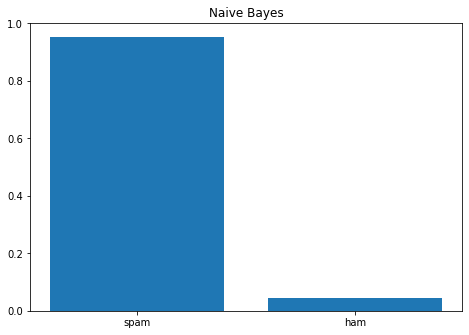

In [21]:
# 스팸 메시지 확인
naive_bayes_classifier("secret is secret", table, p_y)

input message :  sports is healthy
[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]
P(X|Spam):  0.0
P(X|Ham):  0.0007821321487426758
[0.42857143 0.57142857]
[0.         0.00078213]
P(Spam|X):  0.0
P(Ham|X):  1.0
Ham message!!


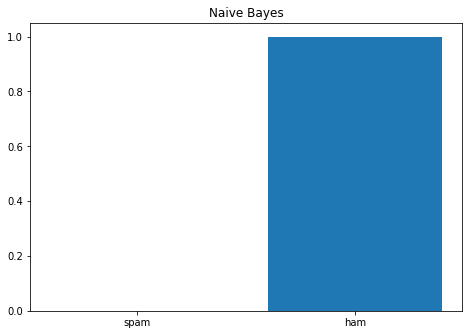

In [24]:
# 정상 메시지 확인
naive_bayes_classifier("sports is healthy", table, p_y)

### P(X | Spam) = 0...
### Need Laplace Smoothing!


input message :  sports is healthy
[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]
P(X|Spam):  8.201740942286845e-06
P(X|Ham):  0.0006861148608509721
[0.42857143 0.57142857]
[8.20174094e-06 6.86114861e-04]
P(Spam|X):  0.008885752336132029
P(Ham|X):  0.9911142476638679
Ham message!!


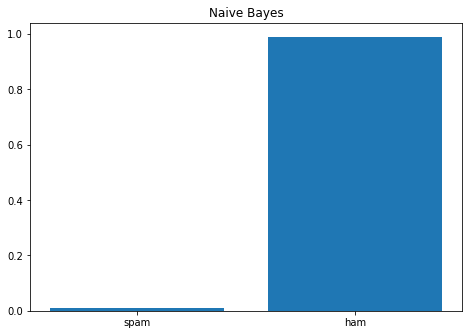

In [26]:
# practical naive bayes : laplace smoothing 적용
naive_bayes_classifier("sports is healthy", table, p_y, laplace_smoothing = True)